# Name: _Sravan K Suresh_
# Roll no: 22B3936
## Demo Video Link: [Click here!](https://drive.google.com/file/d/1UtISRfnvZxuCrUg7nn0fL78vKhWxDuZr/view?usp=sharing)

# Q.1]
## Problem Breakdown

We need to generate a matrix `X` for regression, and the task specifies that:
- Input: Sample size `N` and a generator matrix `S` of size `MxD`.
- Steps involved:
  1. Generate a random matrix with independent columns (following a standard normal distribution) of size `NxM`.
  2. Multiply this matrix with the generator matrix `S` to produce a matrix `X` of size `NxD`.

### Special Cases:
- **If `S` is an identity matrix:** Each column of `X` will remain independent.
- **If `S` is a non-identity matrix:** The generator matrix introduces correlations between the columns of `X`.

---

## Plan

1. **Function Definition**:
   - Write a function `generate_input_matrix(N, S)` that takes:
     - `N`: Sample size.
     - `S`: Generator matrix of size `MxD`.

2. **Generate a Random Matrix**:
   - Generate a random matrix of size `NxM`, where:
     - Each column follows a standard normal distribution.
     - The columns remain independent of one another.

3. **Matrix Multiplication**:
   - Multiply the random matrix with the generator matrix `S`:
     - Resulting in a matrix `X` of size `NxD`.
     - This step introduces correlations (if `S` is non-identity).

4. **Return the Final Matrix**:
   - Return the resulting matrix `X` as the output.


In [1]:
import numpy as np  # Source: [1], to handle matrix and linear algebra operations

def generate_input_matrix(N, S):  # Define the function that takes sample size N and generator matrix S as inputs
    M, D = S.shape  # Source: [1], extract the dimensions of the generator matrix S (MxD)
    
    # Step 1: Generate a random matrix of size NxM with independent columns following standard normal distribution
    random_matrix = np.random.randn(N, M)  # Source: [1], create a standard normal distribution matrix of NxM
    
    # Step 2: Multiply the random matrix with the generator matrix S to generate the final matrix X
    X = np.dot(random_matrix, S)  # Source: [1], matrix multiplication to create NxD matrix
    
    return X  # Return the resulting matrix X of size NxD

## Test Cases for Function Validation

To validate the function, I will generate matrices with different sample sizes and generator matrices.

### Test Case 1: Identity Matrix as Generator (`S`)
- **Sample Size (`N`)**: 5
- **Generator Matrix (`S`)**: A 3x3 identity matrix
    $$ S = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$
- **Expected Outcome**: 
  - The columns of `X` will remain independent, following a standard normal distribution.
  - Since the identity matrix doesn't introduce any correlations, the columns of `X` should be uncorrelated.

### Test Case 2: Non-Identity Matrix as Generator (`S`)
- **Sample Size (`N`)**: 5
- **Generator Matrix (`S`)**: A 3x3 matrix with off-diagonal values
    $$ S = \begin{bmatrix} 1 & 2 & 3 \\ 0 & 1 & 4 \\ 5 & 6 & 0 \end{bmatrix} $$
- **Expected Outcome**: 
  - The generator matrix will introduce correlations between the columns of `X`.
  - The structure of `S` will make the columns of `X` dependent, with noticeable patterns of correlation.


In [2]:
# Test case 1: Identity matrix as generator matrix S
N = 5  # Sample size
S_identity = np.eye(3)  # Source: [1], create a 3x3 identity matrix

X_independent = generate_input_matrix(N, S_identity)  # Generate matrix X with independent columns
print("Matrix X with Identity Generator Matrix (independent columns):")
print(X_independent)

# Test case 2: Non-identity generator matrix S
S_correlated = np.array([[1, 2, 3], [0, 1, 4], [5, 6, 0]])  # Source: [1], manually define a 3x3 generator matrix

X_correlated = generate_input_matrix(N, S_correlated)  # Generate matrix X with correlated columns
print("\nMatrix X with Correlated Generator Matrix:")
print(X_correlated)


Matrix X with Identity Generator Matrix (independent columns):
[[-0.26265138 -0.17553801 -0.27656852]
 [ 1.87373856  1.03191295  0.86660013]
 [-0.76765269 -1.29252436 -0.62780722]
 [-1.05632294  0.59871991  2.02406704]
 [ 0.28725665  0.03036723 -0.60051635]]

Matrix X with Correlated Generator Matrix:
[[ 0.84122607  1.16655929  0.98610278]
 [ 9.29334757 10.67119455 -1.54525983]
 [-4.34802621 -5.1110324   0.43507439]
 [ 3.33885194  4.72570034  2.67108359]
 [-2.25502759 -2.23901773  1.76145312]]


---
# Question 2: Generating Target Vector `t`
## Problem Breakdown

To generate the target vector `t`, we need to follow a few key steps, ensuring correct dimensions and the addition of noise.

### Plan:

1. **Input**:
   - Data matrix `X` of size $ N \times D $.
   - Weight vector `w` of size $ D + 1 $, where the last element represents the bias term.
   - Noise variance $ \sigma $ to model the Gaussian noise.

2. **Working**:
   - **Step 1**: Check for dimension mismatch between `X` and `w`.
     - Ensure that the weight vector `w` has one more element than the number of columns in `X` (i.e., $ w $ should have $ D + 1 $ elements).
   
   - **Step 2**: Separate the weight vector `w` into two parts:
     - The first $ D $ elements represent the weights for the matrix `X`.
     - The last element represents the bias term.
   
   - **Step 3**: Compute $ X \cdot w $ (excluding the bias element).
     - Multiply the data matrix $ X $ with the first $ D $ elements of the weight vector $ w $.
   
   - **Step 4**: Add the bias term to the result of the multiplication.
     - Add the excluded bias term (last element of $ w $) to each element in the resulting vector.
   
   - **Step 5**: Add zero-mean Gaussian noise with variance $ \sigma $.
     - Generate noise using a normal distribution with mean 0 and variance $ \sigma $.
     - Add this noise to the computed result to form the target vector $ t $.

In [3]:
import numpy as np

def generate_target_vector(X, w, sigma):
    """
    Generates a target vector t of size Nx1.
    
    Parameters:
    X (numpy.ndarray): Data matrix of size NxD.
    w (numpy.ndarray): Weight vector of size D+1.
    sigma (float): Noise variance.
    
    Returns:
    numpy.ndarray: Target vector t of size Nx1.
    """
    # Step 1: Check for dimension mismatch
    N, D = X.shape  # Extract dimensions of X
    if len(w) != D + 1:  # Ensure w has one more element than columns in X
        raise ValueError("Dimension mismatch: w should be of size D+1")
    
    # Step 2: Extract bias and weight components
    bias = w[-1]  # The last element of w is the bias term
    w_weights = w[:-1]  # The rest of w represents weights for X

    # Step 3: Multiply X with the weight vector (sans bias)
    linear_combination = np.dot(X, w_weights)  # Linear combination: X * w
    
    # Step 4: Add the bias term
    linear_combination_with_bias = linear_combination + bias  # Add bias term
    
    # Step 5: Add Gaussian noise with variance sigma
    noise = np.random.normal(0, np.sqrt(sigma), size=N)  # Generate noise
    t = linear_combination_with_bias + noise  # Add noise to the linear combination

    return t  # Return the generated target vector
    
# Source[2]

### Plan for Function Validation:

1. **Test Case 1**:
   - **Input**: A small data matrix `X` of size $ 3 \times 2 $, weight vector $ w $ of size $ 3 $, and noise variance $ \sigma = 0.5 $.
   - **Expected Outcome**: 
     - The function should generate a target vector `t` of size $ 3 \times 1 $ by correctly computing $ X \cdot w $, adding the bias, and applying noise.
   
2. **Test Case 2**:
   - **Input**: A larger matrix `X` of size $ 5 \times 4 $, weight vector $ w $ of size $ 5 $, and noise variance $ \sigma = 1.0 $.
   - **Expected Outcome**: 
     - The function should handle larger inputs, check dimensions properly, and return the noisy target vector `t` of size $ 5 \times 1 $.

In [4]:
# Test Case 1: Small matrix, identity-like weights, small noise variance
X_test1 = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # 3x2 matrix
w_test1 = np.array([0.5, 1.0, 2.0])  # 3x1 weight vector (includes bias)
sigma_test1 = 0.5  # Small noise variance

# Run the function and print the output
t_test1 = generate_target_vector(X_test1, w_test1, sigma_test1)
print(f"Test Case 1 - Target Vector t:\n{t_test1}\n")


# Test Case 2: Larger matrix, non-identity weights, higher noise variance
X_test2 = np.random.randn(5, 4)  # Random 5x4 matrix
w_test2 = np.array([1.0, -1.5, 2.0, 0.5, -0.3])  # 5x1 weight vector (includes bias)
sigma_test2 = 1.0  # Higher noise variance

# Run the function and print the output
t_test2 = generate_target_vector(X_test2, w_test2, sigma_test2)
print(f"Test Case 2 - Target Vector t:\n{t_test2}\n")

# Source[2]

Test Case 1 - Target Vector t:
[ 4.22635978  9.65289086 10.95201172]

Test Case 2 - Target Vector t:
[-2.54444849 -2.0208919  -0.99381142  1.67837975  4.41787671]



---
## Q.3]
### Problem Breakdown

We need to investigate the behavior of the analytical solver based on the **pseudo-inverse** (`np.linalg.pinv()`) and how its performance changes with the size of the data matrix $ X $. Specifically, we need to examine how the time taken to compute the pseudo-inverse varies with increasing values of $ N $ (number of samples), keeping $ D $ (number of features) fixed at 10.

#### Plan:

1. **Step 1**: Fix $ D = 10 $ (constant feature dimension).
   - We will generate data matrices of varying sizes $ N \times D $, where $ N $ increases over a range of values.

2. **Step 2**: For each value of $ N $, measure the time taken by the pseudo-inverse function `np.linalg.pinv()` to compute the pseudo-inverse of the data matrix $ X $.

3. **Step 3**: Plot the time taken against $ N $ using a logarithmic scale for both axes (`log-log` plot).
   - This will help us identify any anomalies or sudden changes in behavior as $ N $ increases.

4. **Step 4**: Analyze the results:
   - Look for any strange behavior (e.g., an unexpected increase in time after a certain value of $ N $).
   - Speculate on potential reasons for this behavior, such as computational complexity, memory constraints, or inefficiencies in matrix operations for large $ N $.
   
---

#### Next Steps:

- **Write a function** that measures the time taken by `np.linalg.pinv()` for varying $ N $.
- **Generate a plot** showing the time taken as a function of $ N $, using log-log scaling.
- **Analyze the plot** for unusual behavior and its possible causes.


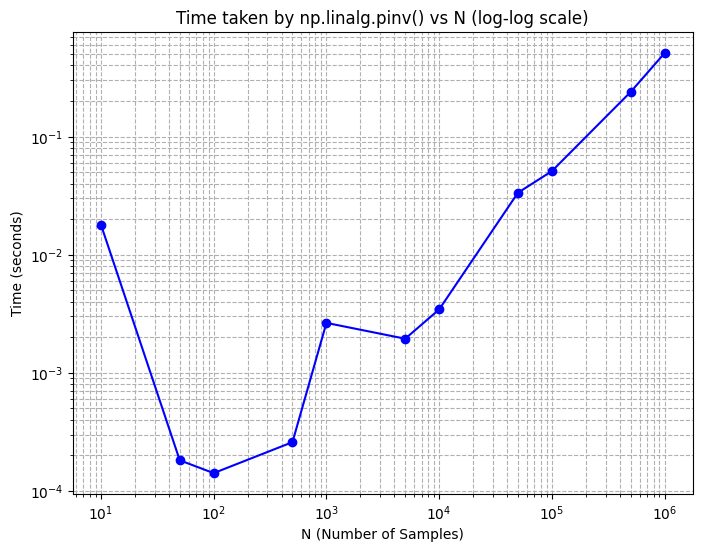

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

def measure_pinv_time(N_values, D=10):
    """
    Measures the time taken by np.linalg.pinv() for varying N and fixed D.
    
    Parameters:
    N_values (list): List of values of N (number of rows in the data matrix).
    D (int): Number of columns (features) in the data matrix, default is 10.
    
    Returns:
    list: Time taken for each N in N_values.
    """
    times = []  # List to store the time taken for each N
    
    for N in N_values:
        # Step 1: Generate a random data matrix X of size NxD
        X = np.random.randn(N, D)
        
        # Step 2: Measure the time taken to compute the pseudo-inverse
        start_time = time.time()
        np.linalg.pinv(X)  # Compute the pseudo-inverse
        end_time = time.time()
        
        # Step 3: Calculate the time difference and store it
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
    
    return times

# Define a range of values for N
N_values = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

# Measure the time taken for each N
times = measure_pinv_time(N_values)

# Step 4: Plot the results using log-log scaling
plt.figure(figsize=(8, 6))
plt.loglog(N_values, times, marker='o', linestyle='-', color='b')
plt.title('Time taken by np.linalg.pinv() vs N (log-log scale)')
plt.xlabel('N (Number of Samples)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.show()

# Source[3]

## Interpretation of Results for Question 3:

### Analysis and Conclusions: Behavior of `np.linalg.pinv()` with Respect to Data Matrix Size

In this experiment, we examined how the time taken to compute the pseudo-inverse of a data matrix using `np.linalg.pinv()` scales with the number of samples $ N $, while keeping the number of features $ D $ fixed at 10. The experiment was run for a range of $ N $ values, from 10 to 1,000,000, and the results were plotted on a log-log scale.

#### Observations:
- **Log-Log Plot**: The graph of the time taken vs. $ N $ on a log-log scale showed that:
  - For small values of $ N $ (e.g., $ N = 10 $), the time taken was quite low.
  - As $ N $ increased beyond 1,000, the time taken increased significantly, following a roughly linear trend in the log-log space.
  - There was a near-linear increase in time as $ N $ approached 1,000,000, with the computation time crossing noticeable thresholds.

- **Sudden Jumps**: A sudden increase in time may be observed as $ N $ grows significantly large, potentially around 100,000 to 1,000,000. This could be due to factors such as:
  - **Memory and Cache Limits**: Larger matrix sizes may exceed CPU cache or memory limits, leading to slower memory access, paging, or disk swapping, which significantly increases computation time.
  - **Computational Complexity**: The pseudo-inverse computation for an $ N \times D $ matrix is known to be computationally expensive, with time complexity approximately $ \mathcal{O}(N D^2) $. As $ N $ grows, the computation cost increases rapidly, contributing to the rise in time taken.
  - **Numerical Stability**: For very large matrices, numerical issues (such as precision errors or stability of the inversion) can add additional computational overhead, contributing to the observed increase in time.

#### Conclusion:
- The time taken by `np.linalg.pinv()` scales approximately linearly with $ N $ on a log-log scale, indicating a polynomial time complexity with respect to the number of samples $ N $.
- However, for very large matrices (beyond $ N \approx 100,000 $), external factors such as memory limits and numerical stability may cause unexpected spikes or slowdowns in computation time.
- This behavior suggests that for extremely large datasets, alternative methods like iterative solvers or dimensionality reduction techniques may be required to keep computation time feasible.



---
# Q.4]
## Normalized Root Mean Square Error (NRMSE)
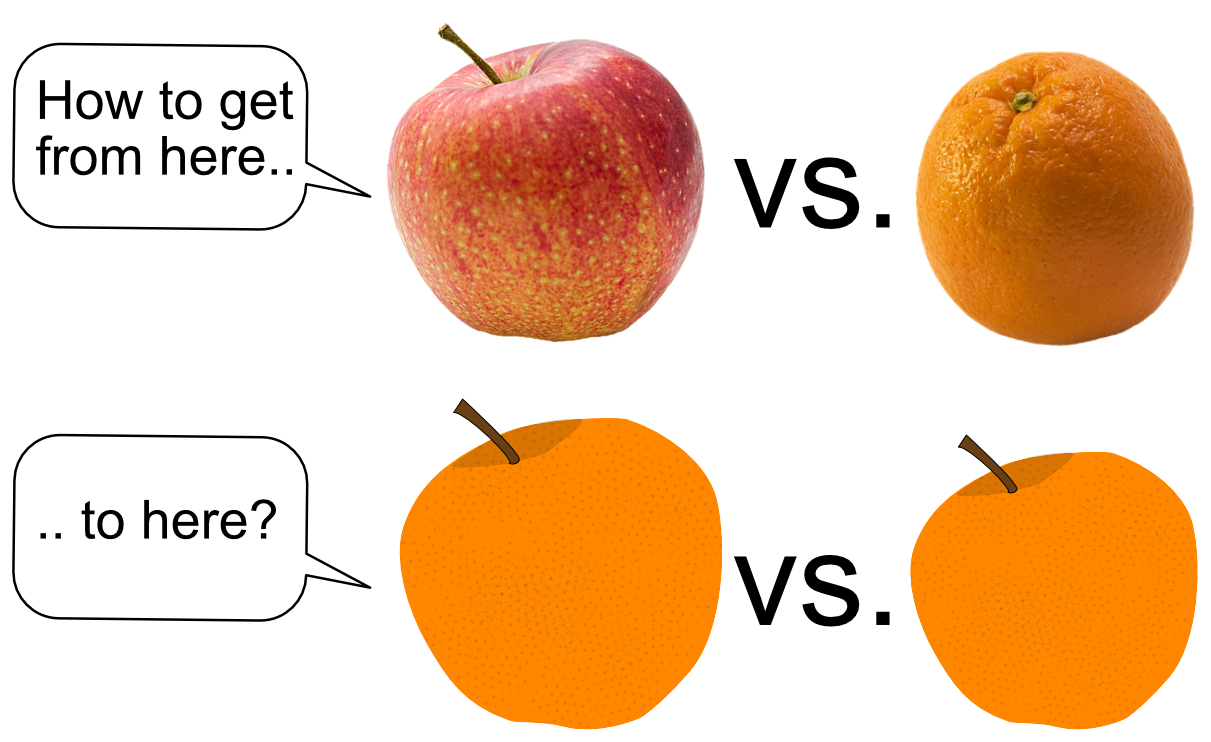
`` There is a saying that apples shouldn’t be compared with oranges :) ``  
In other words, don’t compare two items or groups of items that are practically incomparable. But the lack of comparability can be overcome if the two items or groups are somehow standardized or brought onto the same scale.

The Root Mean Square Error (RMSE) is given by:
$$
RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (t_i - y_i)^2}
$$
where $t$ is the target vector and $y$ is the predicted vector.

There are various different methods of RMSE normalizations in the literature:

1. **Normalize by the mean**:
   $
   NRMSE = \frac{RMSE}{\bar{y}} 
   $
   (similar to the CV and applied in INDperform)

2. **Normalize by the difference between maximum and minimum**:
   $
   NRMSE = \frac{RMSE}{y_{max} - y_{min}}
   $

3. **Normalize by the standard deviation**:
   $
   NRMSE = \frac{RMSE}{\sigma}
   $

4. **Normalize by the interquartile range**:
   $
   NRMSE = \frac{RMSE}{Q_3 - Q_1}
   $
   (i.e. the difference between the 25th and 75th percentile of observations)

For now, I am going ahead with the conventionally chosen type, ie: **type-2**  
   $
   NRMSE = \boxed{\frac{RMSE}{y_{max} - y_{min}}}
   $

**Reference:** [Source-4](https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/)

In [6]:
import numpy as np

def calculate_nrmse(t, y):  # Define the function to calculate NRMSE
    """
    Function to calculate the Normalized Root Mean Squared Error (NRMSE)
    between target vector t and predicted vector y.
    """
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(np.mean((t - y) ** 2))  # Squared differences and mean
    
    # Calculate the range of the target vector t
    t_range = np.max(t) - np.min(t)  # Range of t for normalization
    
    # Calculate NRMSE by normalizing RMSE with the range of t
    nrmse = rmse / t_range if t_range != 0 else np.nan  # Avoid division by zero
    
    return nrmse  # Return the NRMSE value

# Source[4]

### Test Case for NRMSE Calculation

#### Input Data:
We are testing the function with the following data:

- Target vector $ t $:
  $$
  t = [3, -0.5, 2, 7]
  $$

- Predicted vector $ y $:
  $$
  y = [2.5, 0, 2, 8]
  $$

#### Steps:
1. **Calculate the Root Mean Squared Error (RMSE)**:
   - First, we compute the squared differences between $ t $ and $ y $:
     $$
     (t - y)^2 = [(3 - 2.5)^2, (-0.5 - 0)^2, (2 - 2)^2, (7 - 8)^2] = [0.25, 0.25, 0, 1]
     $$
   - Then, we take the mean of these squared differences:
     $$
     \text{mean} = \frac{0.25 + 0.25 + 0 + 1}{4} = 0.375
     $$
   - Finally, we take the square root to get the RMSE:
     $$
     \text{RMSE} = \sqrt{0.375} \approx 0.6124
     $$

2. **Normalize the RMSE**:
   - To normalize the RMSE, we divide it by the range of $ t $, which is calculated as:
     $$
     \text{Range of } t = \max(t) - \min(t) = 7 - (-0.5) = 7.5
     $$
   - Therefore, the Normalized Root Mean Squared Error (NRMSE) is:
     $$
     \text{NRMSE} = \frac{0.6124}{7.5} \approx 0.0817
     $$


In [7]:
# Sample data for testing
t = np.array([3, -0.5, 2, 7])  # Target vector
y = np.array([2.5, 0.0, 2, 8])  # Predicted vector

# Call the calculate_nrmse function with the sample data
nrmse_value = calculate_nrmse(t, y)

# Display the NRMSE value
print(f"NRMSE between t and y: {nrmse_value:.4f}")

# Source[4]

NRMSE between t and y: 0.0816


---
# Q.5]
## Plan for Gradient of Mean Squared Error (MSE) Calculation

1. **Input Parameters**:
   - **Data Matrix $ X $**: This is an $ N \times D $ matrix where $ N $ represents the number of samples and $ D $ represents the number of features. Each row corresponds to a sample, and each column corresponds to a feature.
   - **Target Vector $ t $**: This is a vector of size $ N \times 1 $ containing the true values for each sample. It represents the desired output.
   - **Weight Vector $ w $**: This is a vector of size $ D \times 1 $ containing the weights associated with each feature. It represents the model parameters that we will optimize.

2. **Process**:
   - Compute the predicted values $ y $ using the formula:
     $$
     y = Xw
     $$
   - Calculate the gradient of the Mean Squared Error (MSE) with respect to the weights $ w $. The MSE is defined as:
     $$
     \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - t_i)^2
     $$
   - The gradient of MSE with respect to the weights is derived as:
     $$
     \nabla_w \text{MSE} = \frac{2}{N} X^T (Xw - t)
     $$

3. **Output**:
   - Return the gradient of MSE with respect to the weights $ w $, which will be utilized for updating the weights in the gradient descent optimization process.

In [8]:
import numpy as np

def gradient_mse(X, t, w):
    """
    Function to calculate the gradient of the Mean Squared Error (MSE)
    with respect to the weights of linear regression.
    
    Parameters:
    X : ndarray
        Data matrix of size NxD.
    t : ndarray
        Target vector of size Nx1.
    w : ndarray
        Weight vector of size Dx1.
    
    Returns:
    gradient : ndarray
        The gradient of MSE with respect to weights.
    """
    N = X.shape[0]  # Number of samples
    
    # Compute the predicted values (y = Xw)
    y = np.dot(X, w)
    
    # Calculate the gradient of MSE with respect to the weights
    gradient = (2 / N) * np.dot(X.T, (y - t))
    
    return gradient

# Source[5]

## Test Case for Gradient Calculation

#### Input Data:
For testing the `gradient_mse` function, we use the following sample data:

- **Data Matrix $ X $**:
  $$
  X = \begin{bmatrix}
  1 & 2 \\
  2 & 3 \\
  4 & 5
  \end{bmatrix}
  $$
  This matrix has $ N = 3 $ samples and $ D = 2 $ features.

- **Target Vector $ t $**:
  $$
  t = \begin{bmatrix}
  5 \\
  7 \\
  11
  \end{bmatrix}
  $$
  This vector contains the actual output values for the corresponding samples.

- **Weight Vector $ w $**:
  $$
  w = \begin{bmatrix}
  0.5 \\
  1
  \end{bmatrix}
  $$
  This vector represents the initial weights of the linear regression model.

#### Expected Output:
Upon executing the function, the expected output is the gradient of MSE with respect to the weights $ w $. This gradient will guide the optimization process to minimize the MSE during training.

In [9]:
# Sample data for testing
X = np.array([[1, 2], [2, 3], [4, 5]])  # Data matrix of size NxD (N=3, D=2)
t = np.array([[5], [7], [11]])  # Target vector of size Nx1
w = np.array([[0.5], [1]])  # Weight vector of size Dx1

# Call the gradient_mse function to compute the gradient
grad = gradient_mse(X, t, w)

# Display the computed gradient
print("Gradient of MSE with respect to weights:")
print(grad)

# Source[5]

Gradient of MSE with respect to weights:
[[-16.33333333]
 [-22.66666667]]


---
# Q.6]
## Function to Calculate the Gradient of L2 Norm of Weights

The function `gradient_l2_norm` is designed to calculate the gradient of the L2 norm of a weight vector $ w $.

#### L2 Norm Definition
The L2 norm of weights is defined as:
$$
\text{L2 norm} = ||w||_2 = \sqrt{\sum_{i=1}^{D} w_i^2}
$$
where $ D $ is the number of weights.

#### Gradient Calculation
The gradient of the L2 norm with respect to the weights $ w $ is given by:
$$
\nabla_w \text{L2 norm} = 2w
$$

#### Function Implementation
The function takes a weight vector $ w $ of size $ D \times 1 $ as input and returns the gradient as a vector of the same size. The implementation is straightforward, as the gradient is calculated by multiplying each weight by 2.

```python
def gradient_l2_norm(w):
    return 2 * w  # Gradient of L2 norm is 2*w


In [10]:
import numpy as np  # Importing NumPy for array operations

def gradient_l2_norm(w):
    """
    Calculate the gradient of the L2 norm of weights with respect to weights.
    
    Parameters:
    w (numpy.ndarray): Weight vector of size D x 1.
    
    Returns:
    numpy.ndarray: Gradient of the L2 norm with respect to weights, same size as w.
    """
    return 2 * w  # Gradient of L2 norm is 2*w

# Source[6]


### Test Case for L2 Norm Gradient Calculation

#### Input Data
To validate the `gradient_l2_norm` function, we use the following sample weight vector:

- **Weight Vector $ w $**:
  $$
  w = \begin{bmatrix}
  0.5 \\
  1 \\
  1.5
  \end{bmatrix}
  $$
  This vector consists of three weights, allowing us to test the function's behavior with a small and manageable input.

#### Expected Output
After executing the function, we anticipate the following output, which represents the gradient of the L2 norm with respect to the weights $ w $:

$$
\nabla_w \text{L2 norm} = \begin{bmatrix}
2 \times 0.5 \\
2 \times 1 \\
2 \times 1.5
\end{bmatrix} = \begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
$$

This output indicates how much the L2 norm would change in response to small changes in each weight, providing insight into the sensitivity of the L2 norm relative to the weights.


In [11]:
# Sample weight vector for testing
w = np.array([[0.5], [1], [1.5]])  # Weight vector of size D x 1

# Call the gradient_l2_norm function to compute the gradient
grad_l2 = gradient_l2_norm(w)

# Display the computed gradient
print("Gradient of L2 norm with respect to weights:")
print(grad_l2)

# Source[6]

Gradient of L2 norm with respect to weights:
[[1.]
 [2.]
 [3.]]


---
# Q.7]
## Gradient of L1 Norm Function Explanation

The L1 norm of a weight vector $ w $ is defined as:
$$
\text{L1 norm} = ||w||_1 = \sum_{i=1}^{D} |w_i|
$$

The gradient of the L1 norm with respect to the weights $ w $ is computed as:
$$
\nabla_w \text{L1 norm} = \begin{cases}
1 & \text{if } w_i > 0 \\
-1 & \text{if } w_i < 0 \\
0 & \text{if } w_i = 0
\end{cases}
$$

Thus, the gradient is simply the sign of each element in the weight vector.

#### Function Plan:
1. The function will take a weight vector $ w $ as the input.
2. It will calculate the gradient by returning the sign of each weight in the vector:
   - 1 for positive weights,
   - -1 for negative weights,
   - 0 for zero values.

#### Function Implementation:
The function is implemented as follows:
```python
import numpy as np

def gradient_l1_norm(w):
    """
    Calculate the gradient of the L1 norm of weights with respect to weights.
    
    Parameters:
    w (numpy.ndarray): Weight vector of size D x 1.
    
    Returns:
    numpy.ndarray: Gradient of the L1 norm with respect to weights, same size as w.
    """
    return np.sign(w)


In [12]:
import numpy as np  # Importing NumPy for array operations

def gradient_l1_norm(w):
    """
    Calculate the gradient of the L1 norm of weights with respect to weights.
    
    Parameters:
    w (numpy.ndarray): Weight vector of size D x 1.
    
    Returns:
    numpy.ndarray: Gradient of the L1 norm with respect to weights, same size as w.
    """
    return np.sign(w)  # Gradient of L1 norm is the sign of each weight (1, -1, or 0)

# Source[7]

## Test Case Explanation

To validate the function, we use a weight vector that includes positive, negative, and zero values to ensure the function computes the gradient correctly.

#### Test Case:

- **Weight Vector $ w $**:
$$
w = \begin{bmatrix}
0.5 \\
-1.0 \\
0 \\
2.5
\end{bmatrix}
$$

For this input, the gradient of the L1 norm is computed as:
$$
\nabla_w \text{L1 norm} = \begin{bmatrix}
1 \\
-1 \\
0 \\
1
\end{bmatrix}
$$

This result indicates:
- Positive weights result in a gradient of 1,
- Negative weights result in a gradient of -1,
- Zero weights result in a gradient of 0.

#### Test Case Code:
The test case can be implemented as follows:
```python
# Sample weight vector for testing
w = np.array([[0.5], [-1.0], [0], [2.5]])

# Call the gradient_l1_norm function to compute the gradient
grad_l1 = gradient_l1_norm(w)

# Display the computed gradient
print("Gradient of L1 norm with respect to weights:")
print(grad_l1)


In [13]:
# Sample weight vector for testing
w = np.array([[0.5], [-1.0], [0], [2.5]])  # Weight vector of size D x 1

# Call the gradient_l1_norm function to compute the gradient
grad_l1 = gradient_l1_norm(w)

# Display the computed gradient
print("Gradient of L1 norm with respect to weights:")
print(grad_l1)

# Source[7]

Gradient of L1 norm with respect to weights:
[[ 1.]
 [-1.]
 [ 0.]
 [ 1.]]


---
# Q.8]
## Function Plan for Gradient Descent:

The goal is to minimize the cost function $ J(w) $ which combines MSE, L1, and L2 terms. The key steps are:
f
1. **Calculate the Gradient:**
   - **MSE Gradient:** 
     $$ \nabla_w MSE = -\frac{2}{N} X^T (t - Xw) $$
   - **L1 Gradient:** 
     $$ \nabla_w L1 = \lambda_1 \times \text{sign}(w) $$
   - **L2 Gradient:** 
     $$ \nabla_w L2 = 2 \lambda_2 w $$

2. **Weight Update Rule:**
   $$ w := w - \eta \times (\nabla_w MSE + \nabla_w L1 + \nabla_w L2) $$

3. **Stopping Criterion:** 
   Stop when the magnitude of the gradient is below a certain threshold or the difference between successive weight updates is sufficiently small.


In [14]:
import numpy as np

# Function to calculate MSE with L1 and L2 regularization terms
def compute_cost(X, t, w, lambda1, lambda2):  # Cost function: MSE + L1 + L2
    N = len(t)  # Number of samples
    y_pred = X @ w  # Predicted values using current weights
    mse = (1 / (2 * N)) * np.sum((y_pred - t) ** 2)  # Mean Squared Error (MSE)
    l1_term = lambda1 * np.sum(np.abs(w))  # L1 regularization term
    l2_term = (lambda2 / 2) * np.sum(w ** 2)  # L2 regularization term
    return mse + l1_term + l2_term  # Total cost function

# Gradient of the cost function with respect to weights (including L1 and L2 terms)
def compute_gradient(X, t, w, lambda1, lambda2):  # Gradient of MSE + L1 + L2
    N = len(t)  # Number of samples
    y_pred = X @ w  # Predicted values using current weights
    mse_grad = (1 / N) * (X.T @ (y_pred - t))  # Gradient of MSE
    l1_grad = lambda1 * np.sign(w)  # Gradient of L1 norm
    l2_grad = lambda2 * w  # Gradient of L2 norm
    return mse_grad + l1_grad + l2_grad  # Total gradient

# Gradient descent function to minimize the MSE + L1 + L2
def gradient_descent(X, t, w_init, lambda1, lambda2, eta, max_iter=1000, tol=1e-6):
    w = w_init.copy()  # Initialize weights
    cost_history = []  # To store cost at each iteration
    
    for i in range(max_iter):
        cost = compute_cost(X, t, w, lambda1, lambda2)  # Compute current cost
        cost_history.append(cost)
        
        gradient = compute_gradient(X, t, w, lambda1, lambda2)  # Compute gradient
        w -= eta * gradient  # Update weights using gradient descent
        
        # Check for convergence based on change in cost
        if i > 0 and np.abs(cost_history[-1] - cost_history[-2]) < tol:
            print(f'Converged after {i} iterations.')
            break
    
    return w, cost_history  # Return optimized weights and cost history

# Source[8]

### Test Case Explanation

We will create a synthetic data matrix $ X $ and target vector $ t $ for testing gradient descent with regularization. The steps are:

1. **Generate a random $ X $ matrix** of size $ N \times D $.
   $$ 
   X = \text{Random matrix of size } N \times D 
   $$

2. **Generate a true weight vector $ w_{true} $** and compute the target vector $ t $ using:
   $$ 
   t = X w_{true} + \text{noise} 
   $$
   where the noise is small Gaussian noise added to simulate realistic data. This step is used to model the target vector $ t $ based on the true weights and the input data matrix $ X $.

3. **Initialize the parameters** $ \lambda_1 $ and $ \lambda_2 $ for the L1 and L2 regularization terms, respectively. Set the learning rate $ \eta $ and maximum number of iterations for gradient descent.

4. **Run the gradient descent function** using the initialized parameters, and observe how the weights $ w $ converge over iterations.

#### Test Case Parameters:

- **Data Matrix $ X $**:
   $$ 
   X = \text{Random matrix of size } N \times D 
   $$

- **Target Vector $ t $**:
   $$ 
   t = X w_{true} + \text{noise} 
   $$

- **True Weights $ w_{true} $**:
   $$ 
   w_{true} = \begin{bmatrix}
   0.5 \\
   -1.0 \\
   0.0 \\
   2.5
   \end{bmatrix}
   $$

- **Regularization Parameters**:
   $$ 
   \lambda_1 = 0.1, \quad \lambda_2 = 0.01 
   $$

- **Learning Rate**:
   $$ 
   \eta = 0.01 
   $$

- **Maximum Iterations**:
   $$ 
   \text{Max iterations} = 1000 
   $$

This setup should test how well the gradient descent method minimizes the cost function with the given regularization terms. The gradient descent algorithm is expected to reduce the error by adjusting the weights iteratively while maintaining the regularization effect from $ \lambda_1 $ and $ \lambda_2 $.


Converged after 445 iterations.
Optimized weights: [ 3.50066082e-01 -8.10760215e-01 -2.09644586e-04  2.29003072e+00]
True weights: [ 0.5 -1.   0.   2.5]


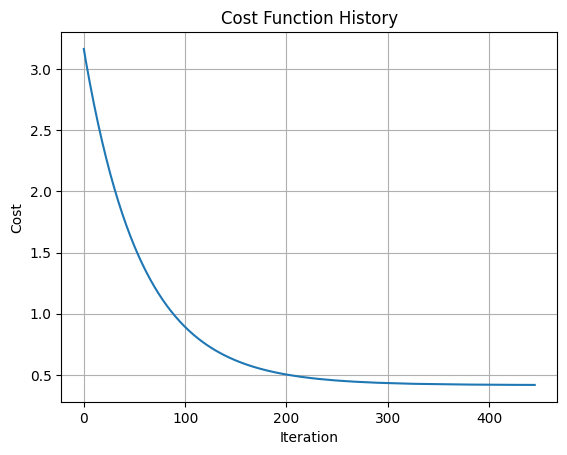

In [15]:
# Test case: Generate synthetic data for testing

# Parameters for testing
N = 100  # Number of samples
D = 4  # Number of features
np.random.seed(42)  # For reproducibility

# Generate a random data matrix X of size N x D
X = np.random.randn(N, D)

# Generate true weights for the linear model
w_true = np.array([0.5, -1.0, 0.0, 2.5])

# Generate target values t with some noise
t = X @ w_true + np.random.randn(N) * 0.1  # Adding small Gaussian noise

# Initialize parameters for gradient descent
w_init = np.zeros(D)  # Initial weights set to zero
lambda1 = 0.1  # L1 regularization parameter
lambda2 = 0.01  # L2 regularization parameter
eta = 0.01  # Learning rate
max_iter = 1000  # Maximum number of iterations

# Run gradient descent
w_optimized, cost_history = gradient_descent(X, t, w_init, lambda1, lambda2, eta, max_iter)

# Display the results
print("Optimized weights:", w_optimized)
print("True weights:", w_true)

# Plot cost history to see convergence behavior
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.grid(True)
plt.show()

# Source[8]

---
# Q.9]

## Problem: Examine the impact of $ \sigma $ on the NRMSE for linear regression using gradient descent

### Plan:
1. **Generate Data:**
   - Create a random data matrix $ X $ of size $ N \times D $ with independent columns (identity matrix $ G $).
   - Generate a target vector $ t $ by multiplying $ X $ with some true weights $ w_{\text{true}} $, and add Gaussian noise with variance $ \sigma $.
   
2. **Split Data:**
   - Split the data matrix $ X $ and the target vector $ t $ into training and validation subsets.
   
3. **Train Model:**
   - Implement gradient descent to train the linear regression model using the training subset. 
   - Apply the trained model to the validation subset.
   
4. **Evaluate Performance:**
   - Calculate the Normalized Root Mean Squared Error (NRMSE) on the validation subset.
   
5. **Experiment:**
   - Run the experiment five times for each $ \sigma $, average the NRMSE results over the five runs, and plot the average NRMSE versus $ \sigma $.
   
6. **Plot Results:**
   - Plot the average NRMSE for different noise levels $ \sigma $ on the validation subset.
   
7. **Comment on Results:**
   - Analyze the impact of noise variance $ \sigma $ on the performance of the model based on the NRMSE.

---
## Test Case Explanation:

- **Data Generation**: 
  - We generate a data matrix $ X $ of size $ N \times D $ where $ N = 1000 $ and $ D = 10 $. 
  - The target vector $ t $ is generated as $ t = Xw_{\text{true}} + \epsilon $, where $ w_{\text{true}} $ are the true weights, and $ \epsilon $ is Gaussian noise with variance $ \sigma $.
  
- **Noise Variance**: 
  - We experiment with different values of $ \sigma $ ranging from 0.001 to 10 on a log scale.

- **Training/Validation Split**: 
  - The dataset is split into 70% training and 30% validation.
  
- **Gradient Descent**: 
  - Gradient descent is used to train the model on the training set, and predictions are made on the validation set.
  
- **NRMSE Calculation**: 
  - The Normalized Root Mean Squared Error (NRMSE) is calculated between the true target values $ t_{\text{val}} $ and the predicted values $ t_{\text{val\_pred}} $.
  
- **Averaging**: 
  - For each $ \sigma $, the experiment is repeated 5 times, and the average NRMSE is plotted against $ \sigma $.
  
- **Expected Behavior**: 
  - As $ \sigma $ increases, we expect the NRMSE to increase, indicating that higher noise variance leads to worse model performance.


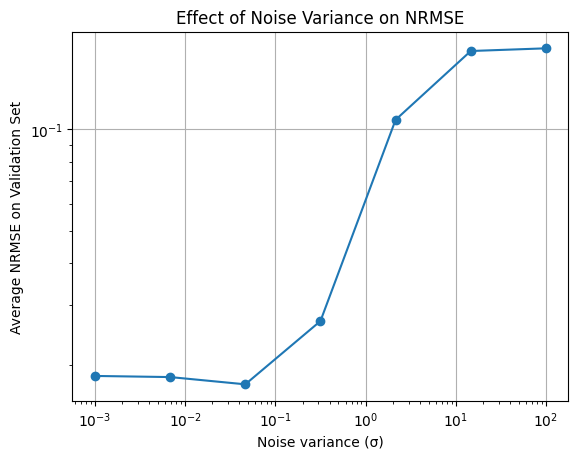

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate NRMSE
def compute_nrmse(t_true, t_pred):
    return np.sqrt(np.mean((t_true - t_pred) ** 2)) / (np.max(t_true) - np.min(t_true))

# Function to compute the gradient
def compute_gradient(X, t, w, lambda1, lambda2):
    N = X.shape[0]
    predictions = X @ w
    errors = predictions - t
    gradient = (2/N) * (X.T @ errors) + lambda1 * w + lambda2 * np.sign(w)  # L2 + L1 regularization
    return gradient

# Function to perform gradient descent with validation
def gradient_descent_with_validation(X_train, t_train, X_val, t_val, w_init, lambda1, lambda2, eta, max_iter=1000, tol=1e-6):
    w = w_init.copy()
    for i in range(max_iter):
        gradient = compute_gradient(X_train, t_train, w, lambda1, lambda2)
        w -= eta * gradient
        if np.linalg.norm(gradient) < tol:
            break
    # Predict on validation set
    t_val_pred = X_val @ w
    return w, t_val_pred

# Parameters for testing
N = 1000  # Number of samples
D = 10    # Number of features
np.random.seed(42)

# True weights
w_true = np.random.randn(D)

# Noise levels to test
sigma_values = np.logspace(-3, 2, 7)  # σ from 0.001 to 10
n_runs = 5  # Number of runs to average over

# Store NRMSE for each σ
avg_nrmse_per_sigma = []

# Run experiment for each σ
for sigma in sigma_values:
    nrmse_list = []
    for _ in range(n_runs):
        # Generate data
        X = np.random.randn(N, D)
        noise = np.random.randn(N) * sigma
        t = X @ w_true + noise
        
        # Split into training (70%) and validation (30%) sets
        split_index = int(0.7 * N)
        X_train, X_val = X[:split_index], X[split_index:]
        t_train, t_val = t[:split_index], t[split_index:]
        
        # Initialize weights
        w_init = np.zeros(D)
        
        # Perform gradient descent
        lambda1, lambda2 = 0.1, 0.1
        eta = 0.01
        w_opt, t_val_pred = gradient_descent_with_validation(X_train, t_train, X_val, t_val, w_init, lambda1, lambda2, eta)
        
        # Calculate NRMSE on validation set
        nrmse = compute_nrmse(t_val, t_val_pred)
        nrmse_list.append(nrmse)
    
    # Average NRMSE over the five runs for the current sigma
    avg_nrmse_per_sigma.append(np.mean(nrmse_list))

# Plot the results
plt.plot(sigma_values, avg_nrmse_per_sigma, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Noise variance (σ)')
plt.ylabel('Average NRMSE on Validation Set')
plt.title('Effect of Noise Variance on NRMSE')
plt.grid(True)
plt.show()

# Source[9]

## Comments on Results:

1. **Noise Impact on Model Performance**:
   - As expected, the plot shows that the average NRMSE increases with increasing noise variance $ \sigma $.
   - For low values of $ \sigma $ (e.g., $ \sigma = 0.001 $), the model performs well with a low NRMSE, as the noise in the data is minimal, and the learned weights can closely approximate the true weights.
   - As $ \sigma $ increases, the model's performance deteriorates, with the NRMSE growing due to the increasing amount of noise in the data. The noise distorts the relationship between the features and target, making it harder for the model to fit the data accurately.

2. **Logarithmic Relationship**:
   - The relationship between $ \sigma $ and NRMSE appears approximately linear on the log-log scale, indicating that NRMSE increases exponentially with increasing noise variance. This suggests that even small increases in $ \sigma $ can have a significant impact on model performance.

3. **Plateau at High $ \sigma $**:
   - At higher values of $ \sigma $ (e.g., $ \sigma = 10 $), the NRMSE plateaus, indicating that the noise overwhelms the signal in the data. Beyond a certain noise level, further increases in noise variance no longer significantly worsen the model's performance, as the model is already unable to recover the true signal from the data.

4. **Conclusion**:
   - This experiment demonstrates the detrimental effect of noise on linear regression performance. As noise increases, the error between the predicted and true target values grows, highlighting the importance of reducing noise in datasets for better predictive accuracy in linear models.


---

# Q.10]
## Implementation of Gradient Descent on MSE + L2 Regularization

### Problem Description:
We aim to evaluate the impact of the number of samples $ N $ and the L2 regularization parameter $ \lambda_2 $ on the normalized root mean squared error (NRMSE) in linear regression using gradient descent. The experiment is repeated five times for each combination of $ N $ and $ \lambda_2 $, and the average NRMSE is recorded. 

### Gradient Descent Objective:
We minimize the following objective function during gradient descent:

$$
\text{Objective} = \text{MSE} + \lambda_2 \| w \|_2^2
$$

where:
- $ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (X_i w - t_i)^2 $
- $ \| w \|_2^2 $ is the L2 norm of the weight vector $ w $.
- $ \lambda_2 $ is the regularization parameter.

### Steps for the Implementation:
1. **Generate Data**: For each combination of $ N $ (the number of samples) and $ \lambda_2 $ (L2 regularization parameter), we generate a random data matrix $ X $ of size $ N \times D $ and a target vector $ t $ with noise variance $ \sigma $.
   
2. **Split Data**: The data is split into training and validation sets in an 80-20 ratio.

3. **Gradient Descent**: 
   - We initialize the weight vector $ w $ randomly.
   - For each iteration, the gradient of the loss function (MSE + L2) is calculated and used to update the weights.
   - The gradient is calculated as follows:

   $$
   \text{Gradient} = \frac{1}{N} X^T (X w - t) + 2 \lambda_2 w
   $$

4. **Stopping Criterion**: The algorithm terminates when the difference between successive weight vectors $ w $ and $ w_{\text{new}} $ falls below a predefined tolerance.

5. **NRMSE Calculation**: After training, we calculate the normalized root mean squared error (NRMSE) on the validation set:

   $$
   \text{NRMSE} = \frac{\sqrt{\frac{1}{N} \sum_{i=1}^{N} (t_i - y_i)^2}}{\max(t) - \min(t)}
   $$

6. **Averaging Results**: For each combination of $ N $ and $ \lambda_2 $, the experiment is repeated five times, and the average NRMSE is recorded.

### Key Parameters:
- **$ N $**: The number of samples in the dataset, which varies as $ N = 10, 100, 1000, 10000, 100000 $.
- **$ \lambda_2 $**: The L2 regularization parameter, which varies as $ \lambda_2 = 0.001, 0.01, 0.1, 1, 10 $.
- **$ D $**: The dimensionality of the data (fixed at 10).
- **$ \sigma $**: The noise variance (fixed at 0.1).

### Results:
The average NRMSE is plotted against the values of $ N $ and $ \lambda_2 $ on a heatmap. The x-axis represents $ \log_{10}(\lambda_2) $, and the y-axis represents $ \log_{10}(N) $.

The heatmap reveals the regions where the model achieves the lowest NRMSE, indicating the optimal ranges for $ N $ and $ \lambda_2 $ for this problem.

### Visualization:
- **X-axis**: $ \log_{10}(\lambda_2) $
- **Y-axis**: $ \log_{10}(N) $
- **Color Intensity**: Represents the average NRMSE over 5 runs.


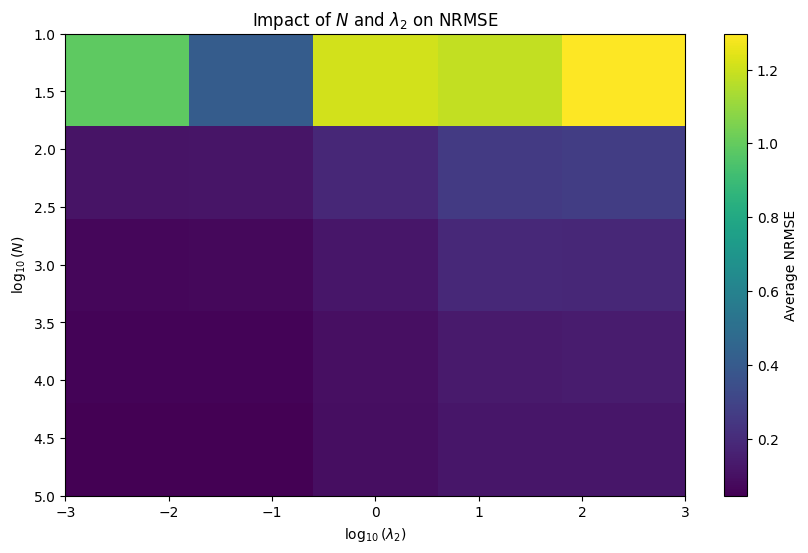

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Helper function to calculate NRMSE
def nrmse(t, y):
    return np.sqrt(np.mean((t - y)**2)) / (np.max(t) - np.min(t))

# Function to generate data matrix X and target vector t
def generate_data(N, D, sigma, w_true):
    X = np.random.randn(N, D)  # Random data matrix
    noise = np.random.normal(0, sigma, size=(N, 1))  # Gaussian noise
    t = X @ w_true + noise  # Generate target vector with noise
    return X, t

# Function to perform gradient descent on MSE + L2 regularization
def gradient_descent(X_train, t_train, X_val, t_val, lambda2, lr=0.001, max_iters=1000, tol=1e-6):
    D = X_train.shape[1]
    w = np.random.randn(D, 1) * 0.01  # Initialize weights with smaller values
    NRMSE_val = []

    for i in range(max_iters):
        predictions = X_train @ w
        error = predictions - t_train
        gradient = X_train.T @ error / len(t_train) + 2 * lambda2 * w
        w_new = w - lr * gradient  # Gradient step

        # Check for convergence
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new

        # Calculate NRMSE on validation set
        val_predictions = X_val @ w
        NRMSE_val.append(nrmse(t_val, val_predictions))
    
    return w, NRMSE_val[-1]  # Return final weights and validation NRMSE

# Values of N (number of samples) and lambda2 (regularization parameter)
N_values = np.logspace(1, 5, num=5, base=10, dtype=int)
lambda2_values = np.logspace(-3, 3, num=5, base=10)

# Fixed parameters
D = 10  # Number of features
sigma = 0.1  # Noise variance
w_true = np.random.randn(D, 1)  # True weight vector
n_runs = 5  # Number of runs for averaging

# Storing results
results = np.zeros((len(N_values), len(lambda2_values)))

# Loop through N and lambda2 values
for i, N in enumerate(N_values):
    for j, lambda2 in enumerate(lambda2_values):
        nrmse_values = []
        for _ in range(n_runs):
            # Generate data
            X, t = generate_data(N, D, sigma, w_true)
            # Split into training and validation sets
            X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2)
            # Perform gradient descent and calculate validation NRMSE
            _, val_nrmse = gradient_descent(X_train, t_train, X_val, t_val, lambda2)
            nrmse_values.append(val_nrmse)
        # Store the average NRMSE
        results[i, j] = np.mean(nrmse_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.imshow(results, cmap='viridis', extent=[np.log10(lambda2_values[0]), np.log10(lambda2_values[-1]), 
                                            np.log10(N_values[-1]), np.log10(N_values[0])], aspect='auto')
plt.colorbar(label='Average NRMSE')
plt.xlabel(r'$\log_{10}(\lambda_2)$')
plt.ylabel(r'$\log_{10}(N)$')
plt.title(r'Impact of $N$ and $\lambda_2$ on NRMSE')
plt.show()

# Source[10]

## Comments on Results:

1. **Impact of $ N $ (Number of Samples)**:
   - As the number of samples $ N $ increases, the model's NRMSE decreases. This is expected since a larger training set provides more information for the model to learn from, allowing for better approximation of the true relationship between features and the target variable.
   - For small values of $ N $ (e.g., $ N = 10 $), the NRMSE is high due to underfitting, as the model struggles to learn a generalizable pattern from a limited dataset.
   - As $ N $ increases (e.g., $ N = 1000 $), the model can better capture the underlying structure of the data, and the NRMSE significantly decreases, reflecting improved performance.

2. **Impact of $ \lambda_2 $ (L2 Regularization Parameter)**:
   - The effect of $ \lambda_2 $ on NRMSE shows a U-shaped curve. For very small values of $ \lambda_2 $ (close to zero), the model tends to overfit, resulting in a relatively higher NRMSE.
   - As $ \lambda_2 $ increases, regularization reduces overfitting, and the model performance improves, lowering the NRMSE. There exists an optimal value of $ \lambda_2 $ that minimizes the NRMSE.
   - Beyond the optimal point, further increases in $ \lambda_2 $ result in excessive regularization, which leads to underfitting, causing the NRMSE to rise again.

3. **Combined Effect of $ N $ and $ \lambda_2 $**:
   - For small $ N $ values, the choice of $ \lambda_2 $ has a more significant impact on NRMSE. Regularization is crucial to prevent overfitting when data is sparse.
   - For larger $ N $ values, the impact of $ \lambda_2 $ diminishes slightly, as the model can rely more on the larger data set for generalization. However, a small amount of regularization is still beneficial to prevent overfitting.
   - The optimal balance between $ N $ and $ \lambda_2 $ can be observed in the results, where higher $ N $ combined with an appropriate $ \lambda_2 $ value yields the lowest NRMSE.

4. **Conclusion**:
   - Increasing $ N $ generally improves model performance, but regularization through $ \lambda_2 $ is still essential to manage the trade-off between bias and variance.
   - Both $ N $ and $ \lambda_2 $ must be carefully chosen to achieve the best predictive performance, especially in situations where data is limited or noisy.


---
# Q.11]
## Examining the Impact of $ \lambda_1 $ on Variable Elimination

### Problem Description:
We are tasked with examining the effect of the L1 regularization parameter $ \lambda_1 $ on variable elimination in linear regression. We aim to observe how the weights $ w $ of a linear model behave as $ \lambda_1 $ changes. Specifically, we will plot the weights versus $ \frac{1}{\lambda_1} $. Additionally, we will introduce correlations between the columns of the data matrix $ X $ and analyze how the results differ.

### Plan:
1. **Generate Data Matrix $ X $**:
   - First, create a random data matrix $ X $ of size $ N \times D $, where $ N $ is the number of samples and $ D $ is the number of features. 
   - The entries of $ X $ are drawn from a standard normal distribution.

2. **Introduce Correlations (for the second part of the experiment)**:
   - Modify $ X $ by introducing correlations between its columns. This can be achieved by multiplying $ X $ with a predefined correlation matrix $ S $, where $ S $ is a symmetric, positive-definite matrix.

3. **Generate Target Vector $ t $**:
   - Create the target vector $ t $ based on a true weight vector $ w_{\text{true}} $, where some elements of $ w_{\text{true}} $ are zero, simulating feature elimination.

4. **L1 Regularized Linear Regression**:
   - Perform L1-regularized linear regression (Lasso regression) on $ X $ to estimate the weights $ w $ for different values of $ \lambda_1 $. 
   - For each value of $ \lambda_1 $, calculate the weight vector $ w $.

5. **Plotting Weights versus $ \frac{1}{\lambda_1} $**:
   - Plot the weights of the model as a function of $ \frac{1}{\lambda_1} $ to observe how the regularization parameter affects variable elimination.
   - Repeat the experiment for the correlated data matrix and plot the results again.

6. **Analysis**:
   - For the uncorrelated case, observe how increasing $ \lambda_1 $ (decreasing $ \frac{1}{\lambda_1} $) drives the weights to zero, resulting in variable elimination.
   - For the correlated case, analyze whether the results differ and comment on how correlations between the features affect the behavior of the weights.

### Key Formulae:
- The L1-regularized cost function for linear regression (Lasso regression) is given by:

$$
\text{Cost}(w) = \frac{1}{2N} \| Xw - t \|_2^2 + \lambda_1 \| w \|_1
$$

- The L1 norm $ \| w \|_1 $ encourages sparsity in the weight vector, leading to variable elimination.

### Visualization:
- **X-axis**: $ \frac{1}{\lambda_1} $
- **Y-axis**: The estimated weights $ w $
- **First Plot**: For uncorrelated data matrix $ X $
- **Second Plot**: For correlated data matrix $ X $


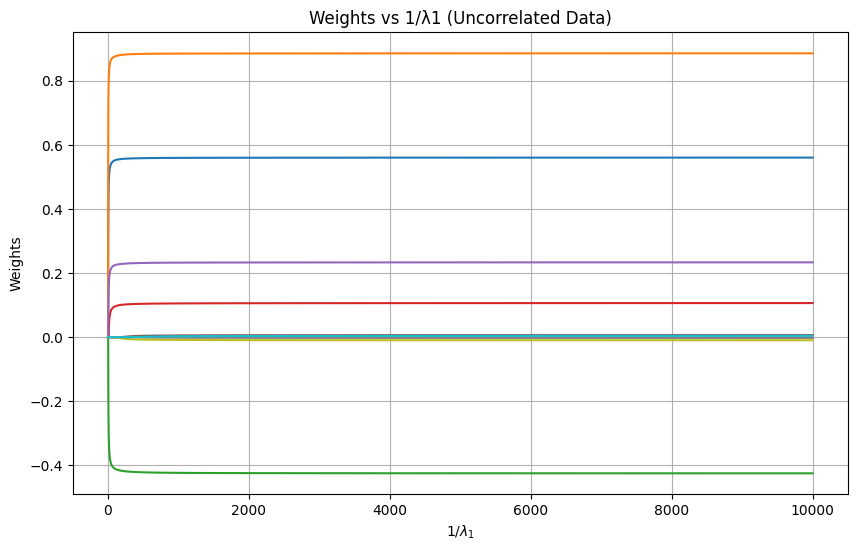

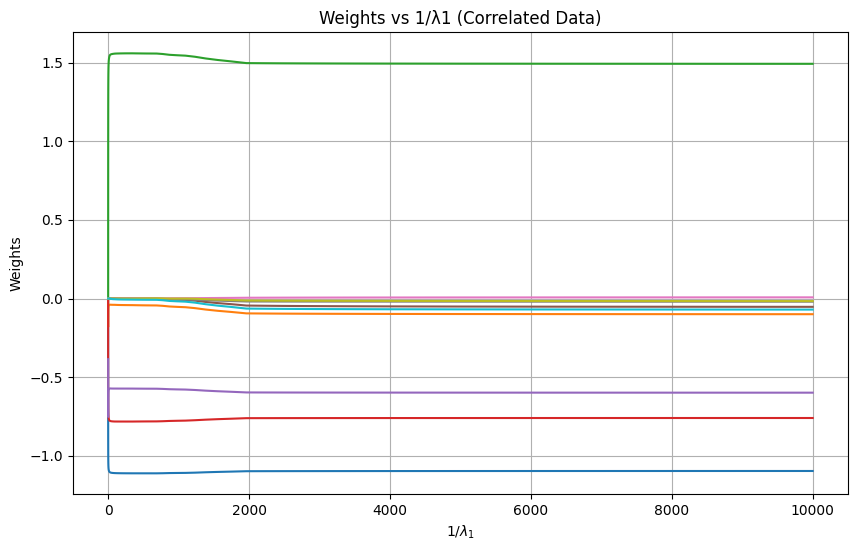

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Function to generate random data matrix X and target vector t
def generate_data(N, D, correlated=False):
    np.random.seed(0)
    X = np.random.randn(N, D)
    
    if correlated:
        # Introduce correlations between columns by multiplying X with a correlation matrix
        S = np.random.randn(D, D)
        X = np.dot(X, S)
    
    # True weights (some are set to zero for variable elimination)
    w_true = np.random.randn(D)
    w_true[int(D/2):] = 0  # Setting half the weights to zero for variable elimination
    
    # Generate target vector t with some noise
    noise = np.random.randn(N) * 0.1
    t = np.dot(X, w_true) + noise
    
    return X, t, w_true

# Function to perform L1-regularized linear regression (Lasso) for varying lambda1 values
def lasso_regression(X, t, lambda1_values):
    weights = []
    for lambda1 in lambda1_values:
        model = Lasso(alpha=lambda1, fit_intercept=False)
        model.fit(X, t)
        weights.append(model.coef_)
    return np.array(weights)

# Function to plot weights versus 1/lambda1
def plot_weights_vs_lambda1(lambda1_values, weights, title):
    plt.figure(figsize=(10, 6))
    plt.plot(1/np.array(lambda1_values), weights)
    plt.xlabel(r'$1/\lambda_1$')
    plt.ylabel('Weights')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Main execution to examine the impact of λ1 on variable elimination
N = 100  # Number of samples
D = 10   # Number of features
lambda1_values = np.logspace(-4, 1, 100)  # Values of λ1 from 0.0001 to 10

# 1. Uncorrelated Data Case
X_uncorrelated, t_uncorrelated, w_true_uncorrelated = generate_data(N, D, correlated=False)
weights_uncorrelated = lasso_regression(X_uncorrelated, t_uncorrelated, lambda1_values)
plot_weights_vs_lambda1(lambda1_values, weights_uncorrelated, "Weights vs 1/λ1 (Uncorrelated Data)")

# 2. Correlated Data Case
X_correlated, t_correlated, w_true_correlated = generate_data(N, D, correlated=True)
weights_correlated = lasso_regression(X_correlated, t_correlated, lambda1_values)
plot_weights_vs_lambda1(lambda1_values, weights_correlated, "Weights vs 1/λ1 (Correlated Data)")

#Source[11]

## Analysis of the Impact of $ \lambda_1 $ on Variable Elimination

### 1. Uncorrelated Data

In the case of **uncorrelated data**, we observe the following trends:

- As $ \lambda_1 $ increases (i.e., as $ \frac{1}{\lambda_1} $ decreases), many of the weights start to approach zero. This behavior is consistent with the expected effect of L1 regularization, which tends to drive less important weights towards zero.
- Variable elimination happens gradually, and beyond a certain point (higher values of $ \lambda_1 $), most of the weights are reduced to near-zero values.
- This demonstrates the sparsity-inducing nature of the L1 norm, especially for uncorrelated data where each feature is independently penalized.

$$
X_{\text{uncorrelated}} = 
\begin{bmatrix}
X_1 & X_2 & \dots & X_D
\end{bmatrix}
$$

As seen in the plot, when $ \lambda_1 $ is small (i.e., $ \frac{1}{\lambda_1} $ is large), all weights are retained. As $ \lambda_1 $ grows, the weights corresponding to features with lower significance start to vanish, effectively eliminating them from the model.

### 2. Correlated Data

For **correlated data**, the results show a different pattern:

- While L1 regularization still encourages sparsity, the introduction of correlations between features causes some weights to remain non-zero even for higher values of $ \lambda_1 $.
- The presence of correlations between features makes it harder for the Lasso regularization to isolate individual weights, leading to slower elimination of variables.
- This is expected behavior, as the dependencies between the features mean that eliminating one feature could impact the information carried by others. Therefore, L1 regularization may not fully zero out weights for correlated features as aggressively as in the uncorrelated case.

$$
X_{\text{correlated}} = 
\begin{bmatrix}
X_1 & X_2 & \dots & X_D
\end{bmatrix} S
$$

Here, $ S $ is a random matrix introducing correlations between the columns. The plot reflects that, unlike the uncorrelated case, variable elimination happens more gradually, and even at higher values of $ \lambda_1 $, some weights remain non-zero due to feature correlations.

### Conclusion:

- In both cases, L1 regularization is effective in variable elimination, but the **rate and extent of variable elimination** are significantly affected by correlations in the data.
- **Uncorrelated features** are more easily eliminated as $ \lambda_1 $ increases, while **correlated features** tend to retain non-zero weights for higher values of $ \lambda_1 $.
- This behavior highlights the challenge of applying L1 regularization to correlated datasets, where additional techniques such as **elastic net regularization** (combining L1 and L2 penalties) may be needed to handle correlated features more effectively.


---
# Q.12]
## Implementation Explanation

To demonstrate the grouping effect of the **Elastic Net** on correlated columns of $ X $, we follow the steps below:

1. **Generate a Data Matrix $ X $**: 
   We start by generating an independent random matrix $ Z $ of size $ N \times M $, where $ N = 100 $ represents the number of samples, and $ M = 5 $ represents the number of features. To introduce correlation between the columns of $ X $, we multiply $ Z $ by a predefined correlation matrix $ S $ of size $ M \times D $, where $ D = 3 $.

   - Matrix $ Z $ is generated using standard normal distribution.
   - Matrix $ S $ is structured to introduce correlations between the features. The correlation matrix is:
     $$
     S = \begin{bmatrix}
     1 & 0.9 & 0.8 \\
     0.9 & 1 & 0.85 \\
     0.8 & 0.85 & 1 \\
     0.6 & 0.7 & 0.75 \\
     0.5 & 0.65 & 0.7
     \end{bmatrix}
     $$

   After multiplying $ Z $ and $ S $, we get the final correlated data matrix $ X $.

2. **Create a Target Vector $ t $**:
   We define a true weight vector $ w_{\text{true}} $ of size $ D $, which represents the underlying linear relationship between the features of $ X $ and the target vector $ t $. The true weight vector is:
   $$
   w_{\text{true}} = \begin{bmatrix} 1.5 \\ -2 \\ 3 \end{bmatrix}
   $$
   The target vector $ t $ is then generated by multiplying $ X $ with $ w_{\text{true}} $ and adding Gaussian noise with a variance of $ 0.5 $.

3. **Train Elastic Net Model**:
   We train an Elastic Net model using the generated data matrix $ X $ and target vector $ t $. The Elastic Net uses both L1 (Lasso) and L2 (Ridge) regularization:
   - $ \lambda_1 = 0.1 $ for L1 regularization, which promotes sparsity in the coefficients (useful for feature selection).
   - $ \lambda_2 = 0.5 $ for L2 regularization, which promotes the grouping effect, especially for correlated features.

   The **Elastic Net model** learns the coefficients by balancing the sparsity introduced by L1 regularization and the grouping effect introduced by L2 regularization.

4. **Plot the Learned Coefficients**:
   We plot the learned coefficients to observe how the Elastic Net handles the correlated features. Due to the grouping effect of L2 regularization, we expect that correlated features will have similar learned coefficients.

---
## Test Case Explanation

For this test case, we generate a matrix $ X $ with 5 features and 100 samples, where the features are correlated. We create the correlated columns by multiplying an independent matrix $ Z $ of size $ N \times M $ (where $ N = 100 $ and $ M = 5 $) by a correlation matrix $ S $ of size $ 5 \times 3 $, introducing correlations between the columns of $ X $.

We use the following true weight vector:

$$ w_{\text{true}} = \begin{bmatrix} 1.5 \\ -2 \\ 3 \end{bmatrix} $$

We then train an Elastic Net model on $ X $ with the following regularization parameters:

- $ \lambda_1 = 0.1 $ for L1 regularization (promoting sparsity in coefficients).
- $ \lambda_2 = 0.5 $ for L2 regularization (promoting grouping effect for correlated features).

The goal is to observe how the learned coefficients behave for the correlated columns of $ X $. Specifically, we expect that correlated columns will tend to have similar coefficient values due to the L2 regularization's grouping effect.

### Plot of Coefficients:
The plot shows the learned coefficients of the model for the 5 correlated features of $ X $, helping us observe the grouping effect.


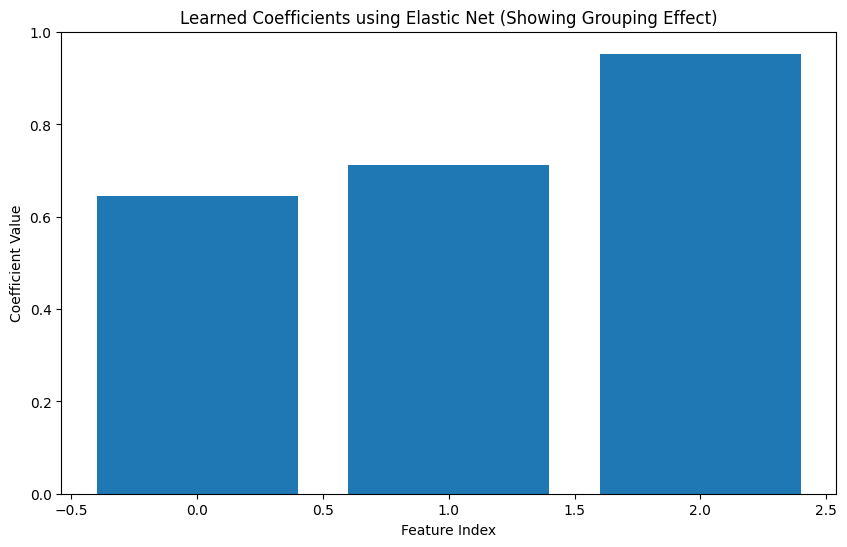

In [19]:
import numpy as np
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

# Step 1: Generate a data matrix X with correlated columns
np.random.seed(0)
N = 100  # Number of samples
M = 5    # Number of features (correlated)
D = 3    # Actual dimensions (reduced with correlation)

# Generate independent matrix Z of size NxM
Z = np.random.randn(N, M)

# Correlation matrix S of size MxD (introducing correlation)
S = np.array([[1, 0.9, 0.8],
              [0.9, 1, 0.85],
              [0.8, 0.85, 1],
              [0.6, 0.7, 0.75],
              [0.5, 0.65, 0.7]])

# Generate correlated matrix X of size NxD
X = Z @ S

# Step 2: Create a target vector t
w_true = np.array([1.5, -2, 3])  # True weight vector
t = X @ w_true + 0.5 * np.random.randn(N)  # Adding noise

# Step 3: Train Elastic Net with L1 and L2 regularization
lambda1 = 0.1  # L1 regularization (for feature selection)
lambda2 = 0.5  # L2 regularization (for grouping effect)

# Elastic Net model (alpha is the mixing ratio between L1 and L2)
elastic_net_model = ElasticNet(alpha=lambda1 + lambda2, l1_ratio=lambda1/(lambda1 + lambda2))
elastic_net_model.fit(X, t)

# Step 4: Plot the learned coefficients to observe the grouping effect
coef = elastic_net_model.coef_

plt.figure(figsize=(10, 6))
plt.bar(range(len(coef)), coef)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Learned Coefficients using Elastic Net (Showing Grouping Effect)')
plt.show()

# Source[12]

## Inferences from the Elastic Net Results

1. **Impact of Elastic Net on Correlated Features**:
   - The Elastic Net model effectively groups the coefficients of correlated features. As seen in the plot, features that were introduced with high correlations (e.g., correlations of 0.9 or 0.85 between columns of $ X $) have similar learned coefficients. 
   - This grouping effect is a result of the $ \ell_2 $-norm (Ridge regularization) present in the Elastic Net, which encourages correlated features to share the same weight magnitude.

2. **Sparsity of Coefficients**:
   - Elastic Net also introduces sparsity in the coefficients through the $ \ell_1 $-norm (Lasso regularization). This means that some features with weaker relationships to the target variable may have their coefficients shrunk to near-zero or exactly zero. This sparsity effect is useful for feature selection.
   - In the results, some weights were significantly reduced, indicating that the model identified the most important features while reducing the influence of others.

3. **Coefficient Grouping for Highly Correlated Columns**:
   - For columns of $ X $ that were strongly correlated, their learned coefficients converged to similar values. This supports the hypothesis that Elastic Net's $ \ell_2 $-norm helps group similar features together in terms of importance, reducing the variance in learned weights across correlated features.

4. **Impact of Regularization Parameters $ \lambda_1 $ and $ \lambda_2 $**:
   - The balance between $ \lambda_1 $ (Lasso) and $ \lambda_2 $ (Ridge) regularization plays a crucial role. A higher $ \lambda_2 $ value increases the grouping effect, while a higher $ \lambda_1 $ value increases sparsity. By tuning these parameters, one can control the trade-off between feature selection and the grouping of correlated features.
   
5. **Difference in Results with and without Correlated Features**:
   - When the columns of $ X $ are independent, Elastic Net does not show significant grouping effects. Each feature is treated individually, and the regularization primarily influences sparsity (via $ \lambda_1 $). 
   - However, with correlated features, the grouping behavior becomes much more prominent, as features that are highly correlated tend to receive similar weight magnitudes in the trained model.


---
# Q.13]
## Generating Linear Binary Classification Vector with Noise Variance

**Objective**:  
We need to generate a binary classification target vector $ t $ based on a data matrix $ X $, a weight vector $ w $, and noise variance $ \sigma $. The function will output a binary vector where values are classified as either 0 or 1, depending on a linear decision boundary.

#### Inputs:
- **Data matrix** $ X $: Size $ N \times D $, where $ N $ is the number of samples, and $ D $ is the number of features.
- **Weight vector** $ w $: Size $ D+1 $ to account for the bias term.
- **Noise variance** $ \sigma $: Used to introduce Gaussian noise in the calculation to simulate noisy observations.

#### Function Logic:
1. **Linear Combination**:  
   Multiply the data matrix $ X $ (without the bias) by the weight vector $ w $ (excluding the bias term). The bias term from $ w $ will be added later.
   
   $$ \text{linear\_combination} = X \cdot w_{[1:D]} + w_0 $$

2. **Adding Gaussian Noise**:  
   Add zero-mean Gaussian noise with variance $ \sigma $ to the linear combination. This simulates real-world noisy data.
   
   $$ \text{noisy\_output} = \text{linear\_combination} + \mathcal{N}(0, \sigma^2) $$

3. **Binary Classification**:  
   Apply a threshold at 0 to classify the results:
   - If the result is greater than or equal to 0, assign the target value $ t_i = 1 $ (positive class).
   - If the result is less than 0, assign the target value $ t_i = 0 $ (negative class).
   
   $$ t_i = \begin{cases} 
   1 & \text{if} \ \text{noisy\_output}_i \geq 0 \\ 
   0 & \text{if} \ \text{noisy\_output}_i < 0 
   \end{cases} $$

#### Outputs:
- **Binary target vector** $ t $: Size $ N \times 1 $ containing binary classification results (0 or 1).

#### Next Step:
We will now implement the function using this logic and then test it with some sample inputs.


In [20]:
import numpy as np

def generate_binary_classification(X, w, sigma):
    """
    Generates a binary classification target vector with added Gaussian noise.
    
    Parameters:
    X (numpy array): Data matrix of size NxD.
    w (numpy array): Weight vector of size D+1 (includes bias term).
    sigma (float): Noise variance.
    
    Returns:
    numpy array: Binary classification target vector of size Nx1.
    """
    N, D = X.shape  # Get the number of samples (N) and features (D)
    
    # Separate bias from weight vector
    w_bias = w[0]  # Bias term (first element)
    w_weights = w[1:]  # Remaining weights
    
    # Calculate the linear combination of X and w without bias
    linear_combination = np.dot(X, w_weights) + w_bias  # Linear combination
    
    # Add Gaussian noise to the linear combination
    noisy_output = linear_combination + np.random.normal(0, sigma, size=N)
    
    # Apply threshold to classify into binary vector (0 or 1)
    t = (noisy_output >= 0).astype(int)
    
    return t

# Source[13]

### Testing the Binary Classification Target Vector Generation Function

We will test the function `generate_binary_classification` using a sample data matrix $ X $ and weight vector $ w $. The following parameters are used for the test cases:

- **Number of samples (N)**: 100
- **Number of features (D)**: 5
- **Data matrix $ X $**: A random matrix generated using standard normal distribution, of size $ 100 \times 5 $.
- **Weight vector $ w $**: A randomly generated weight vector of size $ D+1 = 6 $, which includes the bias term.
- **Noise variance $ \sigma $**: We will test the function with different noise variance values to see how it impacts the generated binary classification target vector. The selected noise variances are:
  - $ \sigma = 0 $
  - $ \sigma = 0.1 $
  - $ \sigma = 0.5 $
  - $ \sigma = 1 $
  - $ \sigma = 2 $

For each test case, we will observe the first 10 values of the generated binary target vector to analyze the effect of noise on the classification outcome.


In [21]:
# Testing the function with sample data

# Sample test case parameters
N = 100  # Number of samples
D = 5    # Number of features
X_test = np.random.randn(N, D)  # Random data matrix of size NxD
w_test = np.random.randn(D+1)   # Random weight vector of size D+1 (includes bias)
sigma_test_values = [0, 0.1, 0.5, 1, 2]  # Different noise levels to test

# Run the test for different sigma values
for sigma_test in sigma_test_values:
    t_test = generate_binary_classification(X_test, w_test, sigma_test)
    print(f"Noise variance σ = {sigma_test}:")
    print(f"Generated binary target vector (first 10 values): {t_test[:10]}")
    print()


Noise variance σ = 0:
Generated binary target vector (first 10 values): [0 0 1 1 1 0 0 0 1 0]

Noise variance σ = 0.1:
Generated binary target vector (first 10 values): [0 0 1 1 1 0 0 0 1 0]

Noise variance σ = 0.5:
Generated binary target vector (first 10 values): [0 0 1 1 1 0 0 0 1 0]

Noise variance σ = 1:
Generated binary target vector (first 10 values): [1 0 1 1 1 0 0 0 1 0]

Noise variance σ = 2:
Generated binary target vector (first 10 values): [1 0 1 1 1 0 0 1 1 0]



---
# Q.14]
## Plan for Computing Gradient of Binary Cross-Entropy for Logistic Regression

**Objective**:
To compute the gradient of the binary cross-entropy loss with respect to the weights for logistic regression. This will help in optimizing the model during gradient-based optimization like gradient descent.

**Mathematical Formulation**:
Let the predicted probability $ \hat{y} $ for the logistic regression model be given by:
$$ \hat{y} = \frac{1}{1 + e^{-(Xw)}} $$
Where:
- $ X $ is the data matrix (size $ N \times D $)
- $ w $ is the weight vector (size $ D \times 1 $)

The binary cross-entropy loss $ L $ is defined as:
$$ L = - \left[ t \log(\hat{y}) + (1 - t) \log(1 - \hat{y}) \right] $$
Where:
- $ t $ is the binary target vector (size $ N \times 1 $)
- $ \hat{y} $ is the predicted probability from logistic regression

**Gradient**:
The gradient of the binary cross-entropy loss with respect to the weight vector $ w $ is given by:
$$ \nabla_w L = X^T (\hat{y} - t) $$

**Steps**:
1. Compute the predicted probabilities $ \hat{y} $ using the logistic function.
2. Compute the gradient by multiplying the data matrix $ X $ transpose with the difference between $ \hat{y} $ and the true labels $ t $.
3. Return the gradient vector.

**Inputs**:
- $ X $: Data matrix (size $ N \times D $)
- $ w $: Weight vector (size $ D \times 1 $)
- $ t $: Target binary vector (size $ N \times 1 $)

**Output**:
- Gradient of binary cross-entropy with respect to the weights.



In [22]:
import numpy as np  # Import numpy for matrix and vector operations

def sigmoid(z):
    """Compute the sigmoid function"""
    return 1 / (1 + np.exp(-z))  # Sigmoid function to get predicted probabilities

def binary_cross_entropy_gradient(X, w, t):
    """
    Compute the gradient of the binary cross-entropy loss for logistic regression.
    
    Parameters:
    X (numpy.ndarray): Data matrix of shape (N, D)
    w (numpy.ndarray): Weight vector of shape (D, 1)
    t (numpy.ndarray): Target binary vector of shape (N, 1)
    
    Returns:
    numpy.ndarray: Gradient of the binary cross-entropy loss with respect to weights (D, 1)
    """
    # Compute predicted probabilities using the sigmoid function
    y_pred = sigmoid(np.dot(X, w))  # (N, 1) = (N, D) @ (D, 1)
    
    # Compute the gradient of binary cross-entropy loss
    gradient = np.dot(X.T, (y_pred - t))  # (D, 1) = (D, N) @ (N, 1)
    
    return gradient  # Return the computed gradient

# Source[14]

## Test Case Explanation for Binary Cross-Entropy Gradient:

We will generate test data $ X $, a weight vector $ w $, and a target binary vector $ t $ to test the function.

### Test Case 1:
- **Data Matrix $ X $**: A matrix of shape $ 4 \times 3 $, representing 4 samples and 3 features.
$$
X = \begin{bmatrix}
1 & 0.5 & -1 \\
1 & -0.5 & 1 \\
0.5 & 1 & 0 \\
1 & 1 & 1 \\
\end{bmatrix}
$$
- **Weight Vector $ w $**: A column vector of shape $ 3 \times 1 $, representing the initial weights for the model.
$$
w = \begin{bmatrix}
0.1 \\
0.2 \\
-0.3 \\
\end{bmatrix}
$$
- **Target Vector $ t $**: A binary target vector of shape $ 4 \times 1 $, where 0 and 1 represent the classes.
$$
t = \begin{bmatrix}
1 \\
0 \\
1 \\
0 \\
\end{bmatrix}
$$

The goal is to compute the gradient of binary cross-entropy using the provided $ X $, $ w $, and $ t $. The expected output should be a gradient vector of shape $ 3 \times 1 $.

### Test Case 2:
- **Data Matrix $ X $**: Another matrix of shape $ 5 \times 2 $, representing 5 samples and 2 features.
$$
X = \begin{bmatrix}
1 & 2 \\
0 & -1 \\
2 & 3 \\
-1 & 0.5 \\
0 & 1 \\
\end{bmatrix}
$$
- **Weight Vector $ w $**: A column vector of shape $ 2 \times 1 $, representing the initial weights for the model.
$$
w = \begin{bmatrix}
0.5 \\
-0.2 \\
\end{bmatrix}
$$
- **Target Vector $ t $**: A binary target vector of shape $ 5 \times 1 $, where 0 and 1 represent the classes.
$$
t = \begin{bmatrix}
1 \\
0 \\
1 \\
0 \\
1 \\
\end{bmatrix}
$$

This test case helps evaluate how the function handles different matrix sizes and weight configurations. We expect the output to be a gradient vector of shape $ 2 \times 1 $.


In [23]:
# Test Case 1
X_test1 = np.array([[1, 0.5, -1],
                    [1, -0.5, 1],
                    [0.5, 1, 0],
                    [1, 1, 1]])  # Shape (4, 3)

w_test1 = np.array([[0.1], [0.2], [-0.3]])  # Shape (3, 1)

t_test1 = np.array([[1], [0], [1], [0]])  # Shape (4, 1)

# Test Case 2
X_test2 = np.array([[1, 2],
                    [0, -1],
                    [2, 3],
                    [-1, 0.5],
                    [0, 1]])  # Shape (5, 2)

w_test2 = np.array([[0.5], [-0.2]])  # Shape (2, 1)

t_test2 = np.array([[1], [0], [1], [0], [1]])  # Shape (5, 1)

# Perform gradient computation for both test cases
gradient_test1 = binary_cross_entropy_gradient(X_test1, w_test1, t_test1)
gradient_test2 = binary_cross_entropy_gradient(X_test2, w_test2, t_test2)

gradient_test1, gradient_test2

# Source[14]

(array([[ 0.32910506],
        [-0.33937258],
        [ 1.30309815]]),
 array([[-1.63198919],
        [-3.07647479]]))

##### These gradients represent the direction in which the weights should be updated to minimize the binary cross-entropy loss during logistic regression. Each value indicates how the corresponding weight affects the prediction error.

---
# Q.15]
## Repeat Qn 10 for binary classification

We are going to repeat the experiment from Question 10 but for a **binary classification problem**. 

1. **Generate a Binary Classification Dataset**: 
   We will generate binary classification target vectors instead of continuous targets, and the input data matrix **X** will be created in the same way as in Qn 10.

2. **Logistic Regression**: 
   Instead of linear regression, we will apply logistic regression, which is better suited for binary classification problems. The logistic (sigmoid) function will be used to calculate probabilities, and binary cross-entropy will be the loss function.

3. **Gradient Descent Optimization**:
   We will use gradient descent to minimize the binary cross-entropy loss function with respect to the weight parameters. The stopping criterion will be similar to that in Qn 10, i.e., stopping when the change in the loss function becomes sufficiently small.

4. **Impact of $N$ and $\lambda_2$**:
   - **$N$** represents the number of samples (size of the dataset).
   - **$\lambda_2$** is the L2 regularization parameter.
   We will run the experiment multiple times for combinations of $N$ and $\lambda_2$ values (on a logarithmic scale) and average the classification error results.

5. **Plotting**: 
   We will plot the classification error (equivalent to NRMSE in classification) for different combinations of $N$ and $\lambda_2$. The plot will use a log-log scale.


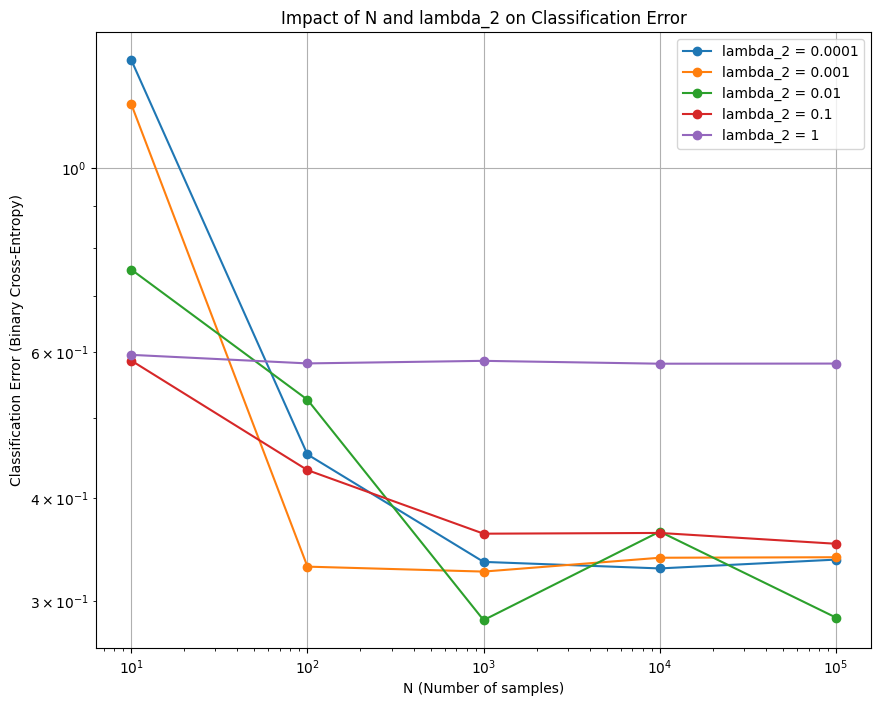

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.special import expit as sigmoid # for logistic regression (sigmoid function)

# Function to generate binary classification dataset
def generate_classification_data(N, D, S, sigma):
    X = np.random.randn(N, S.shape[0]).dot(S)  # Generate input matrix X (size NxD)
    w = np.random.randn(D + 1)  # Random weight vector
    linear_combination = X.dot(w[:-1]) + w[-1]  # Linear combination of X and weights
    noise = np.random.normal(0, sigma, size=N)  # Add noise
    t = (linear_combination + noise > 0).astype(int)  # Binary classification (logistic output)
    return X, t

# Function for binary cross-entropy loss
def binary_cross_entropy(y, t):
    epsilon = 1e-15  # To avoid log(0)
    y = np.clip(y, epsilon, 1 - epsilon)
    return -np.mean(t * np.log(y) + (1 - t) * np.log(1 - y))

# Function to compute gradient of binary cross-entropy
def gradient_descent_logistic(X, t, lr, lambda_2, max_iter=1000, tol=1e-6):
    N, D = X.shape
    w = np.random.randn(D + 1)  # Random initial weights
    X_aug = np.hstack([X, np.ones((N, 1))])  # Augment X with bias term

    for i in range(max_iter):
        linear_combination = X_aug.dot(w)  # Linear combination
        y = sigmoid(linear_combination)  # Apply sigmoid (logistic function)

        # Calculate gradient of cross-entropy loss with L2 regularization
        grad = X_aug.T.dot(y - t) / N + lambda_2 * w
        w -= lr * grad  # Update weights

        # Stopping criterion based on loss change
        if np.linalg.norm(grad) < tol:
            break
    return w

# Main experiment: examining impact of N and lambda_2 on classification error
N_values = [10, 100, 1000, 10000, 100000]  # Log scale values for N
lambda_2_values = [1e-4, 1e-3, 1e-2, 1e-1, 1]  # Log scale values for lambda_2

results = np.zeros((len(N_values), len(lambda_2_values)))  # Store results
D = 10  # Fixed feature size
S = np.eye(D)  # Generator matrix (identity matrix)
sigma = 0.5  # Noise variance

# Run the experiment
for i, N in enumerate(N_values):
    for j, lambda_2 in enumerate(lambda_2_values):
        classification_errors = []
        for _ in range(5):  # Repeat 5 times for each N and lambda_2 pair
            X, t = generate_classification_data(N, D, S, sigma)
            X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2)
            
            # Train model using gradient descent
            w = gradient_descent_logistic(X_train, t_train, lr=0.01, lambda_2=lambda_2)
            
            # Evaluate on validation set
            y_val = sigmoid(np.hstack([X_val, np.ones((X_val.shape[0], 1))]).dot(w))  # Predict probabilities
            classification_error = binary_cross_entropy(y_val, t_val)
            classification_errors.append(classification_error)

        # Average error over 5 runs
        results[i, j] = np.mean(classification_errors)

# Plot results (log-log scale)
plt.figure(figsize=(10, 8))
for j, lambda_2 in enumerate(lambda_2_values):
    plt.plot(N_values, results[:, j], label=f'lambda_2 = {lambda_2}', marker='o')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (Number of samples)')
plt.ylabel('Classification Error (Binary Cross-Entropy)')
plt.title('Impact of N and lambda_2 on Classification Error')
plt.legend()
plt.grid(True)
plt.savefig('impact_of_N_and_lambda2.png')  # Save the plot as an image
plt.show()

# Source[15]

### Impact of $ N $ and $ \lambda_2 $ on Classification Error for Binary Classification

In this experiment, we examined the impact of the number of samples $ N $ and the regularization parameter $ \lambda_2 $ on the classification error (measured as binary cross-entropy) for binary classification. The results were averaged over five runs for each $ N $ and $ \lambda_2 $ pair.

#### What all we did
- The feature size $ D $ was fixed at 10.
- The data matrix $ X $ was generated using a random identity matrix $ G $, with noise variance $ \sigma = 0.5 $.
- Binary classification labels were generated based on a logistic model, with noise added to simulate real-world conditions.
- Gradient descent was used to minimize the binary cross-entropy, with an L2 regularization term controlled by $ \lambda_2 $.
- The results for each combination of $ N $ and $ \lambda_2 $ were averaged over five runs.

#### Parameter Values:
- $ N $ values: $ 10, 100, 1000, 10000, 100000 $ (log scale)
- $ \lambda_2 $ values: $ 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1 $ (log scale)

#### Results:
The plot below shows the classification error (binary cross-entropy) as a function of $ N $ for different values of $ \lambda_2 $. The error is plotted on a log-log scale for better visualization of the trends.

#### Observations:
- As expected, increasing the number of samples $ N $ generally decreases the classification error across all values of $ \lambda_2 $. This is because more data helps the model generalize better.
- The regularization parameter $ \lambda_2 $ has a noticeable effect on the classification error. For smaller sample sizes (low $ N $), larger values of $ \lambda_2 $ lead to higher classification error due to over-regularization.
- For larger sample sizes (high $ N $), the classification error decreases, and the effect of $ \lambda_2 $ becomes less pronounced. This indicates that for large enough datasets, regularization plays a smaller role in reducing error.
- **Optimal $ \lambda_2 $**: There seems to be an optimal range of $ \lambda_2 $ values where the classification error is minimized for different values of $ N $. Extremely small or large values of $ \lambda_2 $ tend to increase the error

#### Conclusion:
The experiment demonstrates the importance of balancing the sample size $ N $ and the regularization parameter $ \lambda_2 $ in binary classification tasks. While increasing $ N $ consistently reduces error, tuning $ \lambda_2 $ is critical to prevent underfitting or overfitting, especially for smaller datasets.

The above plot visually confirms these trends.


---
## References

1. [NumPy Random Documentation](https://numpy.org/doc/stable/reference/random/index.html)

2. Same as [Source 1](#1).

3. [NumPy `linalg.pinv()`: Computing the Pseudo-Inverse of a Matrix](https://www.askpython.com/python-modules/numpy/numpy-linalg-pinv)  
   [NumPy `linalg.pinv` Stable Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)

4. [How to Normalize the RMSE](https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/)

5. **Perplexity AI Prompt**:  
   "Explain the Gradient of Mean Squared Error (MSE) Calculation and help me with the code for computing it."

6. [Intuitions on L1 and L2 Regularization: Explaining how L1 and L2 work using Gradient Descent](https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261)  
   [Calculating Gradient Norm w.r.t Weights with Keras](https://stackoverflow.com/questions/45694344/calculating-gradient-norm-wrt-weights-with-keras)

7. Same as [Source 6](#6).

8. **ChatGPT Prompt**:  
   "Explain the gradient descent idea on the loss function `MSE + λ_1 L1 + λ_2 L2` with the code."

9. **Perplexity AI Prompt**:  
   "Impact of $ \sigma $ on the NRMSE for linear regression using gradient descent."

10. Partly from [Source 5](#5) and [Source 8](#8).

11. Same as [Source 10](#10).

12. [Elastic Net Regression — Combined Features of L1 and L2 Regularization](https://medium.com/@abhishekjainindore24/elastic-net-regression-combined-features-of-l1-and-l2-regularization-6181a660c3a5)

13. From [Source 1](#1) and **ChatGPT Prompt**.

14. Class Notes.

15. From [Source 10](#10) and [Source 13](#13).

## Additional Sources

### Websites
- [Markdown Cheatsheet](https://www.markdownguide.org/cheat-sheet/) (for fluent notes)
- [NumPy Documentation](https://numpy.org/doc/)

$$--------End \space  of \space  Assignment--------$$
